In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("ogait/thesis_gravity_spy")
summary_list = [] 
config_list = [] 
name_list = [] 
for run in runs: 
    # run.summary are the output key/values like accuracy.
    # We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict) 

    # # run.config is the input metrics.
    # # We remove special values that start with _.
    config = {k:v for k,v in run.config.items() if k in ('architecture', 'view')}
    config_list.append(config) 

    # run.name is the name of the run.
    name_list.append(run.name)       

summary_df = pd.DataFrame.from_records(summary_list) 
config_df = pd.DataFrame.from_records(config_list) 
name_df = pd.DataFrame({'name': name_list}) 
all_df = pd.concat([name_df, config_df,summary_df], axis=1)

In [ ]:
all_df = all_df[:32]
all_df.to_csv("logs/03_baseline_scratch.csv")

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
all_df = pd.read_csv('logs/03_baseline_scratch.csv')

In [ ]:
view_order=sorted(sorted(all_df['view'].unique()), key=len)
view_order.insert(4, view_order.pop(0))
arch_order = sorted(all_df['architecture'].unique())

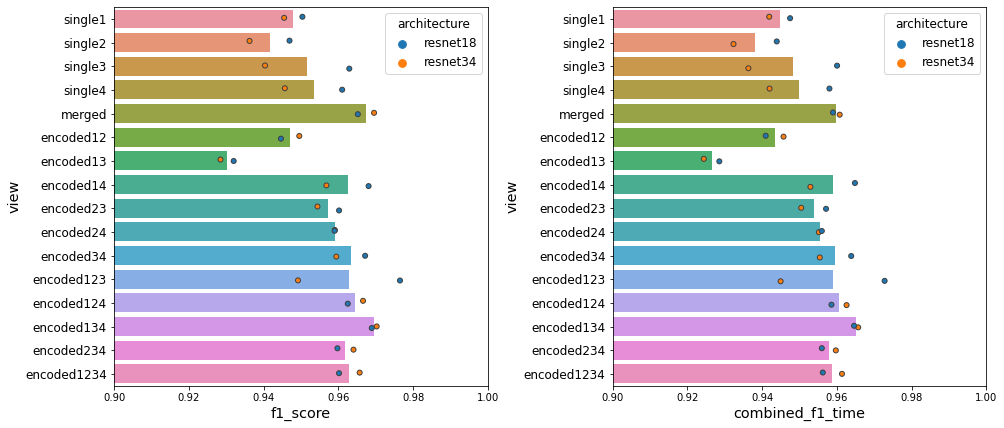

In [ ]:
plt.rc('font', size=10) 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(y='view', x='f1_score', data=all_df, errwidth=0, order=view_order)
sns.stripplot(y='view', x='f1_score', data=all_df, hue='architecture', linewidth=1, order=view_order, hue_order=arch_order)
plt.xlim([0.9, 1])
plt.yticks(fontsize='large')
plt.legend(frameon=True, title='architecture', fontsize='large', title_fontsize='large')

plt.subplot(1, 2, 2)
sns.barplot(y='view', x='combined_f1_time', data=all_df, errwidth=0, order=view_order)
sns.stripplot(y='view', x='combined_f1_time', data=all_df, hue='architecture', linewidth=1, order=view_order, hue_order=arch_order)
plt.xlim([0.9, 1])
plt.yticks(fontsize='large')
plt.legend(frameon=True, title='architecture', fontsize='large', title_fontsize='large')
fig.tight_layout()
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, size='x-large')
    l = ax.get_ylabel()
    ax.set_ylabel(l, size='x-large')

#fig.savefig('../figs/glitches/03_baseline_scratch_view_.pdf', dpi=600)

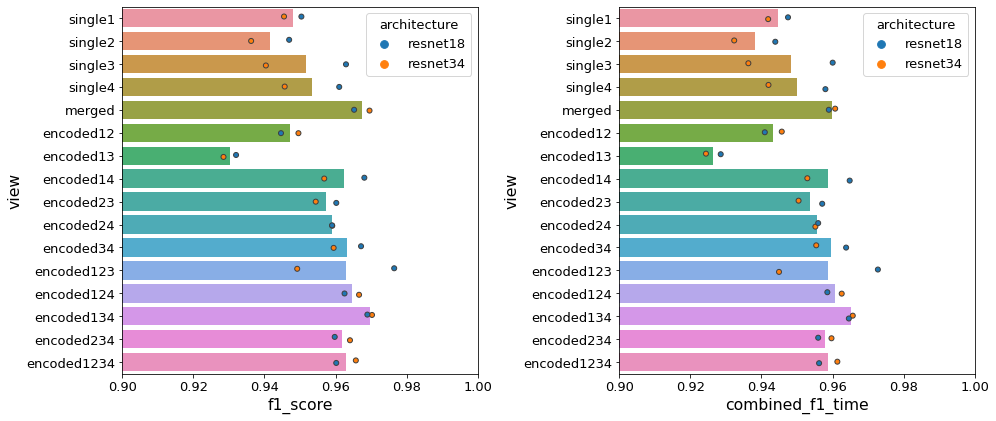

In [ ]:
plt.rc('font', size=13) 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(y='view', x='f1_score', data=all_df, errwidth=0, order=view_order)
sns.stripplot(y='view', x='f1_score', data=all_df, hue='architecture', linewidth=1, order=view_order, hue_order=arch_order)
plt.xlim([0.9, 1])
# plt.legend(frameon=True, title='architecture')

plt.subplot(1, 2, 2)
sns.barplot(y='view', x='combined_f1_time', data=all_df, errwidth=0, order=view_order)
sns.stripplot(y='view', x='combined_f1_time', data=all_df, hue='architecture', linewidth=1, order=view_order, hue_order=arch_order)
plt.xlim([0.9, 1])
fig.tight_layout()
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, size='large')
    l = ax.get_ylabel()
    ax.set_ylabel(l, size='large')
    

fig.savefig('../figs/glitches/03_baseline_scratch_view_v2.pdf', dpi=600)

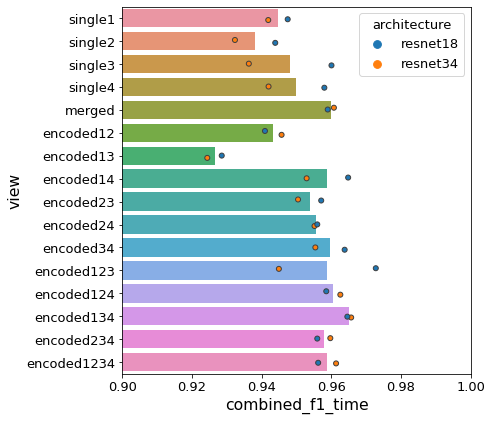

In [ ]:
plt.rc('font', size=13) 

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 6))
sns.barplot(y='view', x='combined_f1_time', data=all_df, errwidth=0, order=view_order)
sns.stripplot(y='view', x='combined_f1_time', data=all_df, hue='architecture', linewidth=1, order=view_order, hue_order=arch_order)
plt.xlim([0.9, 1])
fig.tight_layout()
for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, size='large')
    l = ax.get_ylabel()
    ax.set_ylabel(l, size='large')
    

fig.savefig('../figs/glitches/03_baseline_scratch_view_combined.pdf', dpi=600)

In [ ]:
all_df.groupby('view').mean()['f1_score'].sort_values(ascending=False)

view
encoded134     0.969604
merged         0.967391
encoded124     0.964572
encoded34      0.963317
encoded1234    0.962949
encoded123     0.962855
encoded14      0.962459
encoded234     0.961914
encoded24      0.959043
encoded23      0.957313
single4        0.953362
single3        0.951666
single1        0.947946
encoded12      0.947100
single2        0.941594
encoded13      0.930237
Name: f1_score, dtype: float64

In [ ]:
all_df.groupby('view').mean()['total_runtime'].sort_values(ascending=False)

view
merged         226.292683
encoded134     133.863416
encoded1234    124.896736
encoded234     122.400160
encoded124     120.342269
encoded123     120.111538
encoded13      113.284844
encoded12      113.099809
encoded34      111.061620
encoded14      107.839278
encoded23      106.381423
single3        104.674003
single2        104.457869
encoded24      104.278208
single4        101.283415
single1         98.007999
Name: total_runtime, dtype: float64

In [ ]:
(226/15 - 125/15) / (125/15), (226/15 - 125/15)

(0.8079999999999998, 6.7333333333333325)

In [ ]:
125/15, 226/15

(8.333333333333334, 15.066666666666666)

In [ ]:
(226/15 - 134/15) / (134/15), (226/15 - 134/15)

(0.6865671641791045, 6.133333333333333)

In [ ]:
134/15, 226/15

(8.933333333333334, 15.066666666666666)

In [ ]:
all_df.groupby('view').mean()['combined_f1_time'].sort_values(ascending=False)

view
encoded134     0.965142
encoded124     0.960560
merged         0.959848
encoded34      0.959615
encoded14      0.958865
encoded123     0.958851
encoded1234    0.958786
encoded234     0.957834
encoded24      0.955567
encoded23      0.953767
single4        0.949986
single3        0.948177
single1        0.944679
encoded12      0.943330
single2        0.938112
encoded13      0.926460
Name: combined_f1_time, dtype: float64

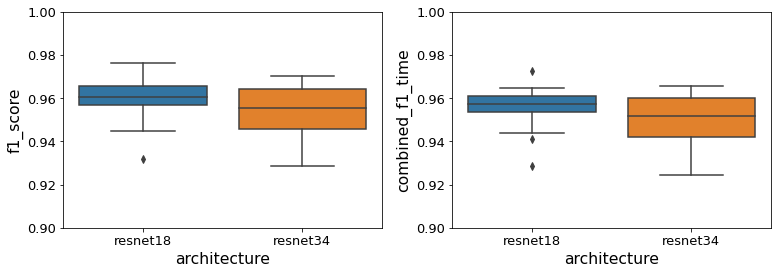

In [ ]:
plt.rc('font', size=13) 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 4))

plt.subplot(1, 2, 1)
ax = sns.boxplot(x='architecture', y='f1_score', data=all_df, order=arch_order)
#sns.stripplot(x='architecture', y='f1_score',  data=all_df, linewidth=1, size=8, order=arch_order)
# plt.xlabel('architecture', size='large')
# plt.ylabel('f1_score', size='large')
plt.ylim([0.9, 1])

plt.subplot(1, 2, 2)
ax = sns.boxplot(x='architecture', y='combined_f1_time', data=all_df, order=arch_order)
#sns.stripplot(x='architecture', y='combined_f1_time', data=all_df, linewidth=1, size=8, order=arch_order)
# plt.xlabel('architecture', size='large')
# plt.ylabel('combined_f1_time', size='large')
plt.ylim([0.9, 1])

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, size='large')
    l = ax.get_ylabel()
    ax.set_ylabel(l, size='large')

fig.tight_layout()
#plt.subplots_adjust(hspace=10)
fig.savefig('../figs/glitches/03_baseline_scratch_arch_v2.pdf', dpi=600)

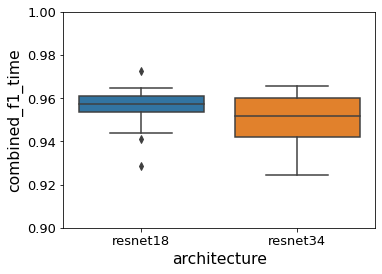

In [ ]:
plt.rc('font', size=13) 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.5, 4))
ax = sns.boxplot(x='architecture', y='combined_f1_time', data=all_df, order=arch_order)
plt.ylim([0.9, 1])

for ax in plt.gcf().axes:
    l = ax.get_xlabel()
    ax.set_xlabel(l, size='large')
    l = ax.get_ylabel()
    ax.set_ylabel(l, size='large')

fig.tight_layout()
fig.savefig('../figs/glitches/03_baseline_scratch_arch_combined.pdf', dpi=600)

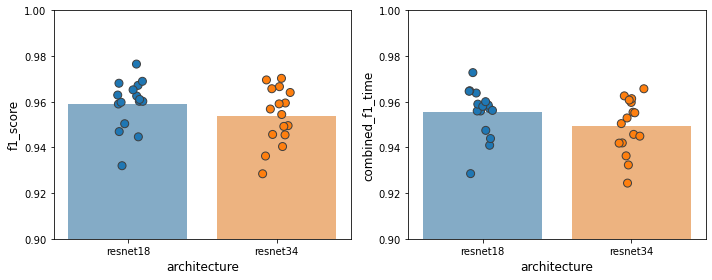

In [ ]:
arch_order = sorted(all_df['architecture'].unique())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.barplot(x='architecture', y='f1_score', data=all_df, errwidth=0, alpha=0.60, order=arch_order)
sns.stripplot(x='architecture', y='f1_score',  data=all_df, linewidth=1, size=8, order=arch_order)
plt.xlabel('architecture', size='large')
plt.ylabel('f1_score', size='large')
plt.ylim([0.9, 1])
#plt.legend(frameon=False)

plt.subplot(1, 2, 2)
ax = sns.barplot(x='architecture', y='combined_f1_time', data=all_df, errwidth=0, alpha=0.6, order=arch_order)
sns.stripplot(x='architecture', y='combined_f1_time', data=all_df, linewidth=1, size=8, order=arch_order)
plt.xlabel('architecture', size='large')
plt.ylabel('combined_f1_time', size='large')
plt.ylim([0.9, 1])

fig.tight_layout()
#fig.savefig('../figs/glitches/03_baseline_scratch_arch.png', dpi=300)

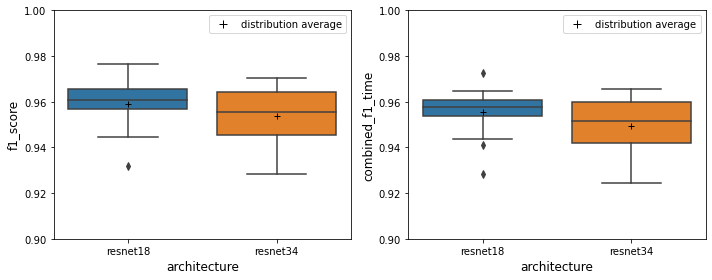

In [ ]:
arch_order = sorted(all_df['architecture'].unique())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

plt.subplot(1, 2, 1)
ax = sns.boxplot(x='architecture', y='f1_score', data=all_df, order=arch_order,
                 showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black"})
#sns.stripplot(x='architecture', y='f1_score',  data=all_df, linewidth=1, size=8, order=arch_order)
plt.xlabel('architecture', size='large')
plt.ylabel('f1_score', size='large')
plt.ylim([0.9, 1])

import matplotlib.lines as mlines
average = mlines.Line2D([], [], color='black', marker='+', linestyle='None',
                          markersize=8, label='distribution average')
ax.legend(handles=[average])
#plt.legend(frameon=False)

plt.subplot(1, 2, 2)
ax = sns.boxplot(x='architecture', y='combined_f1_time', data=all_df, order=arch_order,
                 showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black"})
#sns.stripplot(x='architecture', y='combined_f1_time', data=all_df, linewidth=1, size=8, order=arch_order)
plt.xlabel('architecture', size='large')
plt.ylabel('combined_f1_time', size='large')
plt.ylim([0.9, 1])
ax.legend(handles=[average])

fig.tight_layout()
#fig.savefig('../figs/glitches/03_baseline_scratch_arch.png', dpi=300)

In [ ]:
all_df.groupby('architecture')[['f1_score', 'combined_f1_time']].describe()

f1_score                                                    \
                count      mean       std       min       25%       50%   
architecture                                                              
resnet18         16.0  0.959100  0.010904  0.932002  0.956855  0.960618   
resnet34         16.0  0.953815  0.012391  0.928471  0.945646  0.955619   

                                 combined_f1_time                      \
                   75%       max            count      mean       std   
architecture                                                            
resnet18      0.965711  0.976501             16.0  0.955475  0.010728   
resnet34      0.964472  0.970258             16.0  0.949472  0.011925   

                                                                
                   min       25%       50%       75%       max  
architecture                                                    
resnet18      0.928535  0.953838  0.957543  0.960985  0.972762  
resnet34      0.924385  0.941956  0.951674  0.959964  0.965691

In [ ]:
0.955475 - 0.949472, 0.957543 - 0.951674

(0.006002999999999981, 0.005869000000000013)